In [21]:
"""
Created on Friday 12th March 2021

@author: Aditya Asopa, Bhalla Lab, NCBS

"""
## Import libraries
from eiDynamics import plotMaker
import sys
import os
import imp
import pandas as pd
import pickle
import eiDynamics
import matplotlib.pyplot as plt
from eiDynamics import ePhysClasses
from eiDynamics.plotMaker import plotMaker

In [8]:
inputABFfile = "C:\\Users\\Aditya\\OneDrive\\NCBS\\Lab\\Projects\\EI_Dynamics\\Analysis\\testExamples\\2021_04_16_0000_rec.abf"

In [9]:
#Get the path
datafile = os.path.realpath(inputABFfile)
exptDir = os.path.dirname(datafile)
exptFile = os.path.basename(datafile)
fileID = exptFile.split('_rec')[0]
epFile = exptDir + "\\" + fileID + "_ExperimentParameters.py"
epFile = os.path.abspath(epFile)

In [10]:
# Import Experiment Variables
try:
    print ("Looking for experiment parameters locally")
    eP = imp.load_source('ExptParams',epFile)
    print('Local parameters loaded from: ',epFile)
except:
    print ("No special instructions, using default variables.")
    try:
        import eiDynamics.ExperimentParameters_Default as eP
        print('Default Experiment Parameters loaded')
    except:
        print ("No analysis variable found!")

Looking for experiment parameters locally
Local parameters loaded from:  C:\Users\Aditya\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\2021_04_16_0000_ExperimentParameters.py


In [11]:
# importing stimulation coordinates
try:
    coordfile = exptDir + "\\" + fileID + "_coords.txt"
    os.path.isfile(coordfile)
    print('Local coord file loaded from: ',coordfile)  
except:
    print('No coord file found, probably there isn\'t one')
    coordfile = ''

Local coord file loaded from:  C:\Users\Aditya\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\2021_04_16_0000_coords.txt


In [12]:
# Recording cell data and analyses
cellFile = exptDir + "\\" + "cell.pkl"
try:    
    print('Loading local cell data')
    cell = pickle.load(cellFile)
except:
    print('Local cell data not found, creating new cell')
    cell = ePhysClasses.Neuron(eP)

Loading local cell data
Local cell data not found, creating new cell


In [13]:
cell.createExperiment(datafile=datafile,coordfile=coordfile,exptParams=eP)

Loading ABF file
Datafile has 24 sweeps in 6 channels: 
 Ch0: Cell, 
 Ch1: FrameTTL, 
 Ch2: Photodiode, 
 Ch3: Field, 
 Time: Time Axis, 
 cmd: Ch0 Command Signal


In [14]:
cell.experiment

{'50Hz': <eiDynamics.ePhysClasses.Experiment at 0x1299e2f0>}

In [15]:
len(cell.response)

24

In [16]:
resp = cell.response

In [18]:
resp.sample(3)

,Sweep,Repeat,Pattern,numSquares,Coords,Intensity,pulseWidth,StimFreq,EI,IR,...,10,11,12,13,14,15,16,firstPulseTime,AP,PeakResponse
14,14,2,F,15,"[105, 151, 163, 201, 213, 247, 259, 293, 297, ...",100,5,50,I,343.595358,...,9.50,0.00,9.05,1.20,13.10,0.0,13.65,9.70,False,352.499969
20,20,3,D,5,"[209, 247, 259, 301, 393]",100,5,50,I,347.070871,...,19.55,9.30,0.70,6.95,0.05,4.9,18.45,16.75,False,70.933838
13,13,2,E,5,"[251, 305, 343, 397, 451]",100,5,50,I,351.064423,...,15.90,1.15,14.85,15.15,4.30,15.3,10.00,13.30,False,36.033321


In [19]:
# saving 
with open(cellFile,"wb") as f:
    pickle.dump(cell.response, f)

# Plots
plt.figure()
plotMaker(cellFile,ploty="peakTime",plotby="Pattern")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

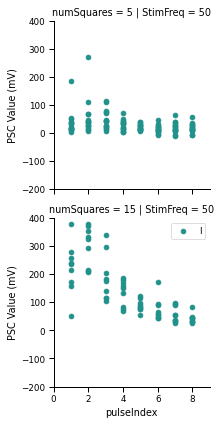

In [22]:
# Plots
plt.figure()
plotMaker(cellFile,ploty="peakRes",plotby="EI")

In [1]:
# Plots
plt.figure()
plotMaker(cellFile,ploty="peakTime",plotby="EI")

NameError: name 'plt' is not defined